# Introduction to machine learning

The following is used to show some simple examples of how to use machine learning. The notebook is structured as follows:

* import used libraries
* generation of a data set used
* visualising the data
* Linar regression
* Creating probabilities
* Classification
* Further reading

### Import packages

In [10]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib

### Create data

We want to show how to linear regression works, to do that we create some data based on a function price

```
 price = size * 43.000 kr + 1000.000 kr
```

adding noise to the square meter price. 

In [11]:
square_meter_prize = 43000
bias = 1000000

In [12]:
def generate_data_point(id, square_meter_prize=43000, bias = 1000000):
    noise_size = 10000
    noise = int(random.random() * noise_size - noise_size/2)
    size = random.choice([x for x in range(50,100)])
    
    return { "id": id, "size": size, "price": size * (square_meter_prize + noise) + bias}

In [13]:
def generate_house_data(number = 20):
    return [generate_data_point(i) for i in range(number)]
house_data = generate_house_data()
house_data

[{'id': 0, 'size': 53, 'price': 3071664},
 {'id': 1, 'size': 74, 'price': 4308244},
 {'id': 2, 'size': 54, 'price': 3304558},
 {'id': 3, 'size': 59, 'price': 3534522},
 {'id': 4, 'size': 53, 'price': 3395282},
 {'id': 5, 'size': 57, 'price': 3418339},
 {'id': 6, 'size': 91, 'price': 5162249},
 {'id': 7, 'size': 98, 'price': 5243400},
 {'id': 8, 'size': 93, 'price': 5425777},
 {'id': 9, 'size': 87, 'price': 4739869},
 {'id': 10, 'size': 83, 'price': 4944907},
 {'id': 11, 'size': 98, 'price': 5064354},
 {'id': 12, 'size': 83, 'price': 4451555},
 {'id': 13, 'size': 60, 'price': 3849520},
 {'id': 14, 'size': 75, 'price': 4316125},
 {'id': 15, 'size': 65, 'price': 3880020},
 {'id': 16, 'size': 78, 'price': 4044886},
 {'id': 17, 'size': 63, 'price': 3414727},
 {'id': 18, 'size': 87, 'price': 4359331},
 {'id': 19, 'size': 67, 'price': 3635043}]

In [14]:
df = pd.DataFrame(house_data)
df[['size', 'price']].head(10).sort_values('size',ascending=True)

,size,price
0,53,3071664
4,53,3395282
2,54,3304558
5,57,3418339
3,59,3534522
1,74,4308244
9,87,4739869
6,91,5162249
8,93,5425777
7,98,5243400


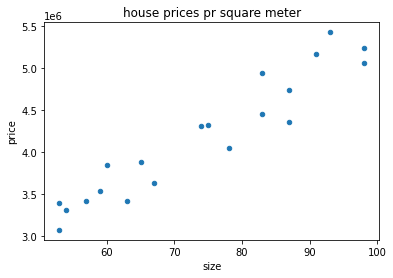

In [15]:
house_plot = df.plot.scatter(x='size', y='price', title="house prices pr square meter")


### Linear Regression

Now imagine you want to use this data to be able to predict new prices. 

We will want to make a model that can predict what we know already. Meaning that if we feed the size part of a data point from above into our model it will predict the price. 



In [16]:
from sklearn.linear_model import LinearRegression

X = pd.DataFrame(df['size'])
y = pd.DataFrame(df['price'])
reg = LinearRegression().fit(X, y)
print(f"price = {reg.coef_[0][0]}X + {reg.intercept_[0]}")


def predict(x):
    return reg.coef_[0][0] * x + reg.intercept_[0]

predict(55)

price = 44959.57280021041X + 855706.1700644507


3328482.674076023

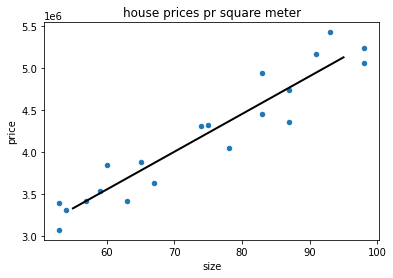

In [17]:

house_plot = df.plot.scatter(x='size', y='price', title="house prices pr square meter",)
house_plot.plot([55, 95], [predict(55), predict(95)], 'k-', lw=2)

### Classification

Instead of wanting to predict the prize, we now want to know if the bank will allow you to buy the house or not. In other words we want to classify each house into either bank_approves or not. 

Again I do some simplyfications and say that the bank will approve if the price is less than or equal to 3.5 times your salary (plus minus some noise to make it more interesting)

In [18]:
salary = 1500000

In [19]:
max_price = df['price'].max()
max_price

5425777

The following method is used to calculate if the bank approves a house, based on the price. 

In [20]:
def bank_approves(salary: float, price: float):
    return 1.0 if salary * 3.25 >= price + (1e6 - 1000000 * random.random()) else 0.

df['bank_approves'] = df['price'].apply(lambda x: bank_approves(salary, x))
df.head(20)

,id,size,price,bank_approves
0,0,53,3071664,1.0
1,1,74,4308244,0.0
2,2,54,3304558,1.0
3,3,59,3534522,1.0
4,4,53,3395282,1.0
5,5,57,3418339,1.0
6,6,91,5162249,0.0
7,7,98,5243400,0.0
8,8,93,5425777,0.0
9,9,87,4739869,0.0


Let's visualise the data again, now with a coloting that shows if the bank approves or not. 

An orange dot significates that the bank approve, while blue it doesn't.

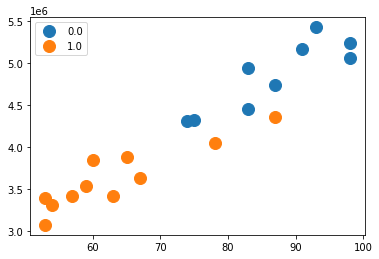

In [21]:
import matplotlib.pyplot as plt

groups = df.groupby('bank_approves')
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['size'], group.price, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

We cannot use linear regression as we did above, since there is not a linear relationship between size and if the bank approves. The problem is that its not that the probability decreases linearly. There are a lot of house the bank will approve for sure... and then a gray area followed by houses that it wont approve. 

A solution could be to use Logistic Regression, which we will try in the following. 

To make it easier for the model we will normalise the price (normalise means that you will scale the values down such that they will be on average zero and distributed around zero.)

In [22]:
df['normalized_x'] = (df['price']-df['price'].mean())/df['price'].std()

Let's just have another look at the data:

In [23]:
df.head()

,id,size,price,bank_approves,normalized_x
0,0,53,3071664,1.0,-1.511998
1,1,74,4308244,0.0,0.177667
2,2,54,3304558,1.0,-1.193771
3,3,59,3534522,1.0,-0.879548
4,4,53,3395282,1.0,-1.069806


Implementing LogisticRegression is very similar to the linear regression above. 

In [24]:
from sklearn.linear_model import LogisticRegression

X = pd.DataFrame(df['size'])
y = pd.DataFrame(df['bank_approves'])
reg = LogisticRegression().fit(X, y)

/Users/kifal2/Dropbox/git/ml-presentation/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


The predict method og the reg object, predicts if the house will be approved by the bank or not (1.0 means approve, 0.0 mean not approved) 

In [25]:
reg.predict([[77.]])

array([0.])

But how is it that it always produces `1.0` or `0.0`? Actually the model produces a probability, which is then meassured against a cut line. To see this let's do a plot of the probabilities (using `predict_proba`)

In [26]:
df['can_buy'] = df['size'].apply(lambda x: reg.predict_proba([[x]])[0][1])
df[['price', 'size', 'bank_approves']].head(10)

,price,size,bank_approves
0,3071664,53,1.0
1,4308244,74,0.0
2,3304558,54,1.0
3,3534522,59,1.0
4,3395282,53,1.0
5,3418339,57,1.0
6,5162249,91,0.0
7,5243400,98,0.0
8,5425777,93,0.0
9,4739869,87,0.0


<AxesSubplot:xlabel='size', ylabel='can_buy'>

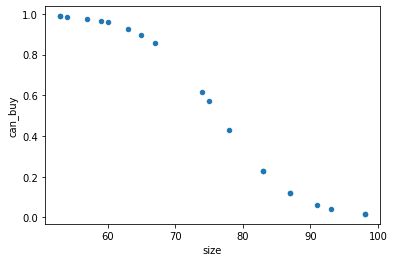

In [27]:
df.plot.scatter(x='size', y='can_buy')

The plot shows that the probability between size:75-90 is not one or zero but somewhere in between. But you can see that playing around with the `predict` method you can see that it cuts a 0.5. 

This was a very short introduction to Linear and logistic regression. Hope you enjoyed it. Read more about it on the sklean site [link](https://scikit-learn.org/stable/). 